In [6]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd #data manipulation
import numpy as np

In [7]:
train='C:/Users/LILENDAR/Desktop/PROJECT 1/HR ANALYTICS/train.csv'
test='C:/Users/LILENDAR/Desktop/PROJECT 1/HR ANALYTICS/test.csv'
data1=pd.read_csv(train)
data2=pd.read_csv(test)

In [8]:
data1.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPI                     54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
data1.isnull().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPI                        0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
data1["previous_year_rating"]=data1["previous_year_rating"].fillna(data1["previous_year_rating"].mode)

In [12]:
data1["previous_year_rating"].isnull().sum()

0

In [13]:
#axis =1 for column,and 0 for row removal 
#data1["education"].dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
#cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])
#categorical values can also be filled with mode/mena/median

In [14]:
data3 = data1.dropna(how='any', subset=["education"])


In [15]:
data3["education"].isnull().sum()

0

In [16]:
data3["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [17]:
d={"Master's & above":1,"Bachelor's":0,"Below Secondary":-1}
data3["education"]=data3["education"].apply(lambda data3:d[data3])

C:\Users\LILENDAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
data3.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,1,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,0,m,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,0,m,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,0,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,0,m,other,1,45,3,2,0,0,73,0
5,58896,Analytics,region_2,0,m,sourcing,2,31,3,7,0,0,85,0
6,20379,Operations,region_20,0,f,other,1,31,3,5,0,0,59,0
7,16290,Operations,region_34,1,m,sourcing,1,33,3,6,0,0,63,0
8,73202,Analytics,region_20,0,m,other,1,28,4,5,0,0,83,0
9,28911,Sales & Marketing,region_1,1,m,sourcing,1,32,5,5,1,0,54,0


In [19]:
data3["recruitment_channel"].value_counts()

other       29061
sourcing    22204
referred     1134
Name: recruitment_channel, dtype: int64

In [20]:
data3["department"].value_counts()

Sales & Marketing    15265
Operations           11122
Procurement           7066
Technology            7039
Analytics             5015
Finance               2500
HR                    2386
Legal                 1035
R&D                    971
Name: department, dtype: int64

In [21]:
d={"m":1,"f":0}
data3["gender"]=data3["gender"].apply(lambda data3:d[data3])

d={"Sales & Marketing":1,"Operations":2,"Procurement":3,"Technology":4,"Analytics":5,
   "Finance":6,"HR":7,"R&D":8,"Legal":9}

data3["department"]=data3["department"].apply(lambda data3:d[data3])

d={"other":1,"sourcing":0,"referred":-1}
data3["recruitment_channel"]=data3["recruitment_channel"].apply(lambda data3:d[data3])


C:\Users\LILENDAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LILENDAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\LILENDAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [38]:
data3.head(10)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won?,avg_training_score,is_promoted
0,1,1,0,0,1,35,5,8,1,0,49,0
1,2,0,1,1,1,30,5,4,0,0,60,0
2,1,0,1,0,1,34,3,7,0,0,50,0
3,1,0,1,1,2,39,1,10,0,0,50,0
4,4,0,1,1,1,45,3,2,0,0,73,0
5,5,0,1,0,2,31,3,7,0,0,85,0
6,2,0,0,1,1,31,3,5,0,0,59,0
7,2,1,1,0,1,33,3,6,0,0,63,0
8,5,0,1,1,1,28,4,5,0,0,83,0
9,1,1,1,0,1,32,5,5,1,0,54,0


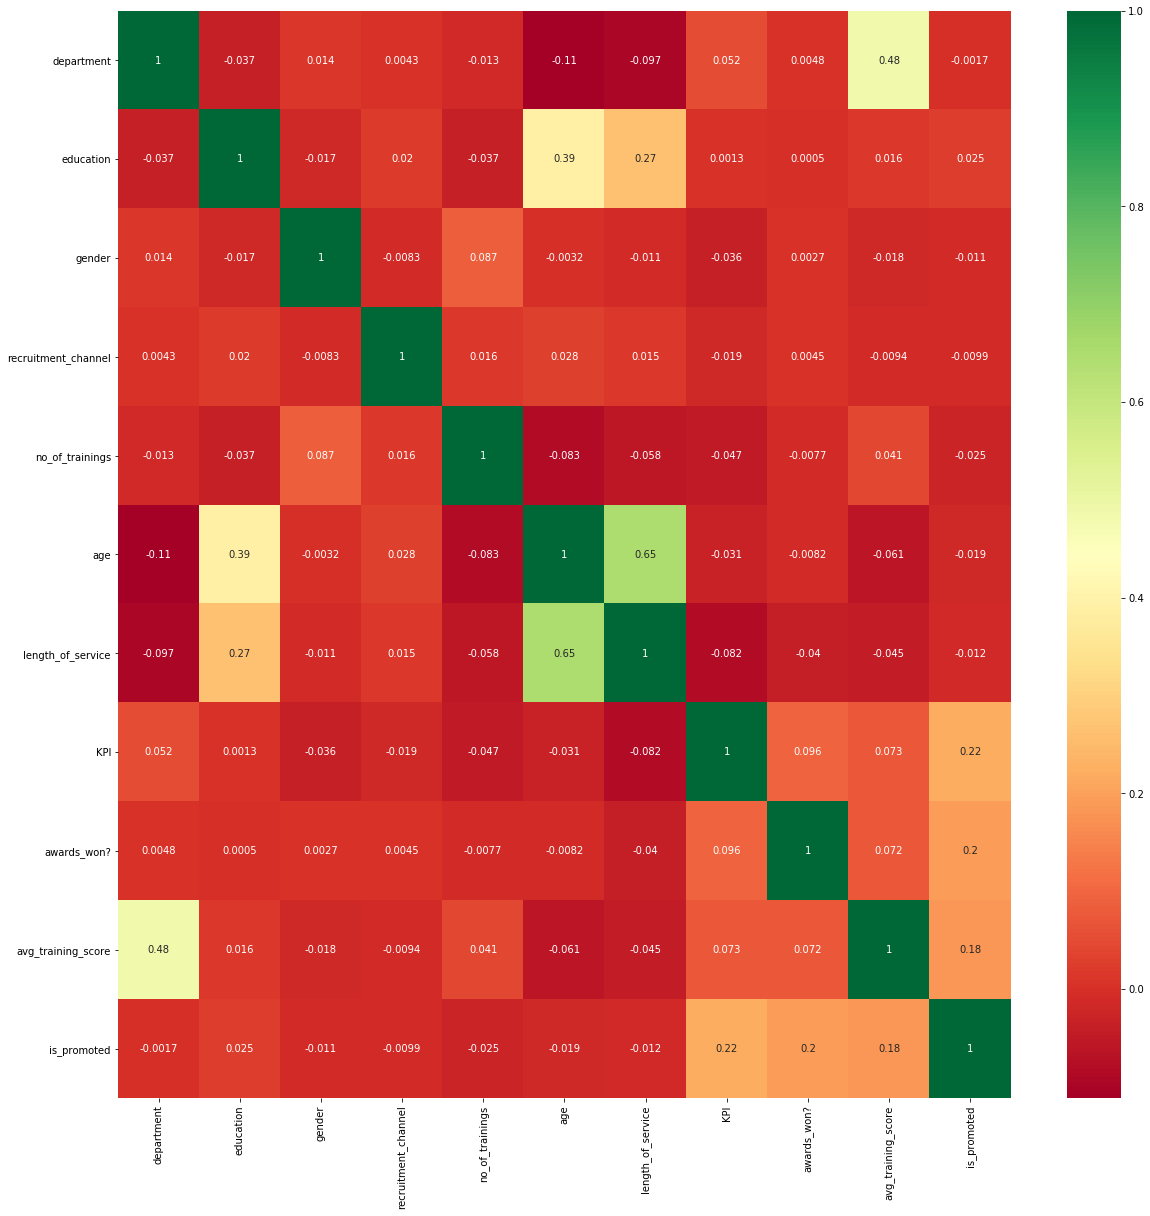

In [39]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data3[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [24]:
data3["KPI"].value_counts()

0    33703
1    18696
Name: KPI, dtype: int64

In [25]:
#KPI NOT TAKEN
#OK SO KPI IS NOT THERE IN TEST DATA
column_target=["is_promoted"]
column_train=["education","gender","no_of_trainings","age","length_of_service","awards_won?","avg_training_score"]
x=data3[column_train]
y=data3[column_target]

x2=data2[column_train]


In [26]:
log_reg = LogisticRegression()
log_reg.fit(x,y)
print(log_reg.coef_)
print(log_reg.intercept_)

C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LILENDAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.23350935 -0.08999992 -0.22695528 -0.0159223   0.01150156  2.07995297
   0.04395024]]
[-4.63925915]


In [76]:
x2.isnull().sum()

education             1034
gender                   0
no_of_trainings          0
age                      0
length_of_service        0
awards_won?              0
avg_training_score       0
dtype: int64

In [32]:
x2["education"].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [ ]:
data1["previous_year_rating"]=data1["previous_year_rating"].fillna(data1["previous_year_rating"].mode)

In [77]:
x2.head()

,education,gender,no_of_trainings,age,length_of_service,awards_won?,avg_training_score
0,Bachelor's,m,1,24,1,0,77
1,Bachelor's,f,1,31,5,0,51
2,Bachelor's,m,1,31,4,0,47
3,Bachelor's,f,3,31,9,0,65
4,Bachelor's,m,1,30,7,0,61
